# Car Reviews

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [2]:
df_reviews = pd.read_csv('02_df_reviews_1.csv').append(pd.read_csv('02_df_reviews_2.csv')).append(pd.read_csv('02_df_reviews_3.csv'))\
               .append(pd.read_csv('02_df_reviews_4.csv')).append(pd.read_csv('02_df_reviews_5.csv'))
df_reviews['datecreated'] = pd.to_datetime(df_reviews['datecreated'])
df_reviews['replaced_message'] = df_reviews['message']
df_reviews.reset_index(drop=True, inplace=True)
df_reviews.head()

,page,group,subgroup,nreview,user,role,postcount,datecreated,hourcreated,message,reply,replaced_message
0,1,Mercedes-Benz,Mercedes-Benz EQS,1.0,Michaell,Moderator,219239.0,2021-12-15,01:37:49,"momoney232 said:Hello, I am trying to get the ...",Yes,"momoney232 said:Hello, I am trying to get the ..."
1,1,Mercedes-Benz,Mercedes-Benz EQS,2.0,guptamk07,Member,2.0,2021-12-15,04:58:19,Thank you for the reply. Can you let me know w...,No,Thank you for the reply. Can you let me know w...
2,1,Mercedes-Benz,Mercedes-Benz EQS,3.0,Michaell,Moderator,219239.0,2021-12-15,06:11:40,guptamk07 said:Thank you for the reply. Can yo...,Yes,guptamk07 said:Thank you for the reply. Can yo...
3,1,Mercedes-Benz,Mercedes-Benz EQS,4.0,Johndoeiv,Member,1.0,2021-12-18,00:31:59,What about the eqs 580? Do you have rates for ...,No,What about the eqs 580? Do you have rates for ...
4,1,Mercedes-Benz,Mercedes-Benz EQS,5.0,Michaell,Moderator,219239.0,2021-12-18,00:39:45,Johndoeiv said:What about the eqs 580? Do you ...,Yes,Johndoeiv said:What about the eqs 580? Do you ...


In [3]:
# Define function to replace text of previous row on each row
def replace_text(row):
    if row.name == 0:
        return row['message']
    elif pd.isnull(df_reviews.loc[row.name,'message']) or pd.isnull(df_reviews.loc[row.name-1,'message']):
        return ''
    elif df_reviews.loc[row.name-1, 'message'][0]=='@':
        b = (10 if len(df_reviews.loc[row.name-1, 'message'])>10 else len(df_reviews.loc[row.name-1, 'message']))
        return df_reviews.loc[row.name, 'message'].split(df_reviews.loc[row.name-1, 'message'][-b:])[-1]
    else:
        a_message = df_reviews.loc[row.name-1,'message'].lstrip(' ').rstrip(' ')
        a_replaced_message = df_reviews.loc[row.name-1, 'replaced_message'].lstrip(' ').rstrip(' ')
        a_usersaid = ('@' + df_reviews.loc[row.name-1, 'user'] if df_reviews.loc[row.name, 'message'][0]=='@' else df_reviews.loc[row.name-1, 'user']) + ' said:'

        return df_reviews.loc[row.name, 'message'].replace(a_message,'').replace(a_replaced_message,'').replace(a_usersaid, '')

In [4]:
# Apply function to create new column with replaced text
df_reviews['replaced_message'] = df_reviews.apply(lambda row: replace_text(row), axis=1)

In [ ]:
# # NUmber of Comments - daily
# fig = plt.figure(figsize=(15,5))
# df_reviews.groupby('datecreated').size().plot(linewidth=0.9)
# plt.axvline('2020-09-01', color='r', linestyle='--')
# plt.title('Number of Comments - daily')
# plt.xlabel('Date')
# plt.ylabel('Number of Comments')
# plt.ylim(0,500);

## Ticker - brands

In [5]:
df_reviews['group'].unique()

array(['Mercedes-Benz', 'Ford', 'Toyota', 'Mazda', 'BMW', 'Honda',
       'Genesis', 'Chevrolet', 'Jeep', 'Acura', 'Hyundai', 'Porsche',
       'Volvo', 'Subaru', 'Infiniti', 'Audi', 'Kia', 'Nissan', 'GMC',
       'Lexus', 'Ram', 'Jaguar', 'Dodge', 'MINI', 'Cadillac',
       'Alfa Romeo', 'Volkswagen', 'Land Rover', 'Lincoln', 'Buick',
       'Chrysler', 'General', 'No', nan, 'Maserati', 'Polestar',
       'Mitsubishi', 'Editorial', 'Deals'], dtype=object)

In [6]:
df_reviews['ticker'] = '.'
df_reviews.loc[df_reviews['group']=='Mercedes-Benz','ticker'] = 'MBGYY'
df_reviews.loc[df_reviews['group']=='Ford','ticker'] = 'F'
df_reviews.loc[df_reviews['group']=='Toyota','ticker'] = 'TM'
df_reviews.loc[df_reviews['group']=='Mazda','ticker'] = 'MZDAY'
df_reviews.loc[df_reviews['group']=='BMW','ticker'] = 'BMWYY'
df_reviews.loc[df_reviews['group']=='Honda','ticker'] = 'HMC'
df_reviews.loc[df_reviews['group']=='Genesis','ticker'] = 'GEL'
df_reviews.loc[df_reviews['group']=='Chevrolet','ticker'] = 'GM'
df_reviews.loc[df_reviews['group']=='Jeep','ticker'] = 'FCAU.VI'
df_reviews.loc[df_reviews['group']=='Acura','ticker'] = 'HMC'       # Honda
df_reviews.loc[df_reviews['group']=='Hyundai','ticker'] = 'HYMTF'
df_reviews.loc[df_reviews['group']=='Porsche','ticker'] = 'POAHY'
df_reviews.loc[df_reviews['group']=='Volvo','ticker'] = 'VLVLY'
df_reviews.loc[df_reviews['group']=='Subaru','ticker'] = 'FUJHY'
df_reviews.loc[df_reviews['group']=='Infiniti','ticker'] = 'NSANY'  # Nissan
df_reviews.loc[df_reviews['group']=='Audi','ticker'] = 'VWAGY'      # Volkswagen
df_reviews.loc[df_reviews['group']=='Nissan','ticker'] = 'NSANY'    
df_reviews.loc[df_reviews['group']=='GMC','ticker'] = 'GM'
df_reviews.loc[df_reviews['group']=='Dodge','ticker'] = 'DODGX'     # Dodge
df_reviews.loc[df_reviews['group']=='MINI','ticker'] = 'BMWYY'      # BMW
df_reviews.loc[df_reviews['group']=='Cadillac','ticker'] = 'GM'     # GM
df_reviews.loc[df_reviews['group']=='Alfa Romeo','ticker'] = 'STLA' # Stellantis
df_reviews.loc[df_reviews['group']=='Volkswagen','ticker'] = 'VWAGY' 
df_reviews.loc[df_reviews['group']=='Lincoln','ticker'] = 'LNC'
df_reviews.loc[df_reviews['group']=='Buick','ticker'] = 'GM'        # GM
df_reviews.loc[df_reviews['group']=='Chrysler','ticker'] = 'FCAU.VI'
df_reviews.loc[df_reviews['group']=='','ticker'] = ''
df_reviews.loc[df_reviews['group']=='Maserati','ticker'] = 'STLA'   # Stellantis
df_reviews.loc[df_reviews['group']=='Polestar','ticker'] = 'PSNY'
df_reviews.loc[df_reviews['group']=='Mitsubishi','ticker'] = 'MSBHF'

In [7]:
lst_stocks = ['MBGYY', 'F', 'TM', 'MZDAY', 'BMWYY', 
              'HMC', 'GEL', 'GM', 'FCAU.VI',
              'HYMTF', 'POAHY', 'VLVLY', 'FUJHY', 'NSANY', 
              'DODGX', 'STLA', 'VWAGY', 'LNC', 'PSNY', 'MSBHF']
lst_names = ['Mercedes-Benz Group AG','Ford Motor Company','Toyota Motor Corporation','Mazda Motor Corporation','Bayerische Motoren Werke Aktiengesellschaft',
             'Honda Motor Co., Ltd.', 'Genesis Energy, L.P.', 'General Motors Company', 'Fiat Chrysler Automobiles N.V.',
             'Hyundai Motor Company', 'Porsche Automobile Holding SE', 'Volvo ADR', 'Subaru Corporation', 'Nissan Motor Co., Ltd.', 
             'Dodge & Cox', 'Stellantis N.V.', 'Volkswagen AG', 'Lincoln National Corp', 'Polestar Automotive Holding UK PLC', 'Mitsubishi Corp']

In [8]:
for i in range(len(lst_stocks)):
  print(lst_stocks[i],'-',lst_names[i])

MBGYY - Mercedes-Benz Group AG
F - Ford Motor Company
TM - Toyota Motor Corporation
MZDAY - Mazda Motor Corporation
BMWYY - Bayerische Motoren Werke Aktiengesellschaft
HMC - Honda Motor Co., Ltd.
GEL - Genesis Energy, L.P.
GM - General Motors Company
FCAU.VI - Fiat Chrysler Automobiles N.V.
HYMTF - Hyundai Motor Company
POAHY - Porsche Automobile Holding SE
VLVLY - Volvo ADR
FUJHY - Subaru Corporation
NSANY - Nissan Motor Co., Ltd.
DODGX - Dodge & Cox
STLA - Stellantis N.V.
VWAGY - Volkswagen AG
LNC - Lincoln National Corp
PSNY - Polestar Automotive Holding UK PLC
MSBHF - Mitsubishi Corp


## Stock Prices

In [9]:
stocks = "MBGYY F TM MZDAY BMWYY HMC GEL GM FCAU.VI HYMTF POAHY VLVLY FUJHY NSANY DODGX STLA VWAGY LNC PSNY MSBHF"
start_date = "2016-12-30"
end_date = date.today()
print('Start Date: {}'.format(start_date))
print('End Date  : {}'.format(end_date))

Start Date: 2016-12-30
End Date  : 2023-04-17


In [10]:
lst_stocks = ['MBGYY', 'F', 'TM', 'MZDAY', 'BMWYY', 
              'HMC', 'GEL', 'GM', 'FCAU.VI', 'ACUR', 
              'HYMTF', 'POAHY', 'VLVLY', 'FUJHY', 'NSANY', 
              'DODGX', 'STLA', 'VWAGY', 'LNC', 'PSNY', 'MSBHF']
lst_names = ['Mercedes-Benz Group AG','Ford Motor Company','Toyota Motor Corporation','Mazda Motor Corporation','Bayerische Motoren Werke Aktiengesellschaft',
             'Honda Motor Co., Ltd.', 'Genesis Energy, L.P.', 'General Motors Company', 'Fiat Chrysler Automobiles N.V.', 'Acura Pharmaceuticals Inc',
             'Hyundai Motor Company', 'Porsche Automobile Holding SE', 'Volvo ADR', 'Subaru Corporation', 'Nissan Motor Co., Ltd.', 
             'Dodge & Cox', 'Stellantis N.V.', 'Volkswagen AG', 'Lincoln National Corp', 'Polestar Automotive Holding UK PLC', 'Mitsubishi Corp']

In [11]:
# Stocks: Yahoo Finance
data = yf.download(tickers = f"{stocks}",
                   start = start_date, end = end_date, # E.g. period = "5y",
                   interval = "1d" # daily
                   )

[*********************100%***********************]  20 of 20 completed


In [12]:
data.head()

Adj Close                                                      \
                BMWYY       DODGX         F FCAU.VI      FUJHY        GEL   
Date                                                                        
2016-12-30  23.355501  119.968864  8.956701     NaN  20.299999  21.163050   
2017-01-03  23.769741  121.147064  9.296362     NaN  20.450001  21.362808   
2017-01-04  23.679361  122.169014  9.724629     NaN  21.320000  21.304054   
2017-01-05  23.973095  121.934677  9.429272     NaN  21.360001  21.121922   
2017-01-06  23.950499  122.182060  9.421889     NaN  21.400000  21.621321   

                                                   ...    Volume        \
                   GM        HMC HYMTF        LNC  ...     MBGYY MSBHF   
Date                                               ...                   
2016-12-30  30.266834  25.357738  41.0  54.327881  ...   93600.0   0.0   
2017-01-03  30.536139  25.722601  41.0  54.852551  ...  234800.0   0.0   
2017-01-04  32.221497  26.634743  41.0  55.549381  ...  263200.0   0.0   
2017-01-05  31.613371  26.634743  41.0  54.778778  ...       0.0   0.0   
2017-01-06  31.265886  26.469692  41.0  55.453934  ...    1200.0   0.0   

                                                                          \
               MZDAY     NSANY    POAHY PSNY        STLA        TM VLVLY   
Date                                                                       
2016-12-30   49200.0   16700.0  16000.0  NaN   4947000.0  153400.0   NaN   
2017-01-03   90700.0   58400.0  16500.0  NaN   8808800.0  204000.0   NaN   
2017-01-04  105000.0  129100.0  19800.0  NaN   7686500.0  250600.0   NaN   
2017-01-05   65100.0   72800.0  31700.0  NaN   6905000.0  525900.0   NaN   
2017-01-06   90500.0  106100.0  16500.0  NaN  17801200.0  171600.0   NaN   

                      
               VWAGY  
Date                  
2016-12-30  152000.0  
2017-01-03  523000.0  
2017-01-04  220200.0  
2017-01-05  400800.0  
2017-01-06  297400.0  

[5 rows x 120 columns]

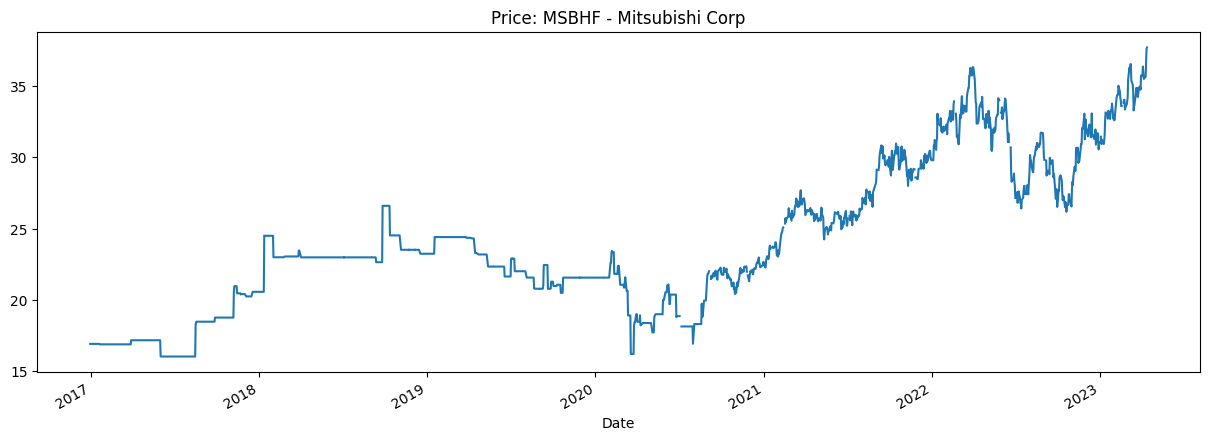

In [ ]:
ticker = 'MSBHF'
name = lst_names[lst_stocks.index(ticker)]

fig = plt.figure(figsize=(15,5))
data['Adj Close'][ticker].plot()
plt.title('Price: {} - {}'.format(ticker, name));

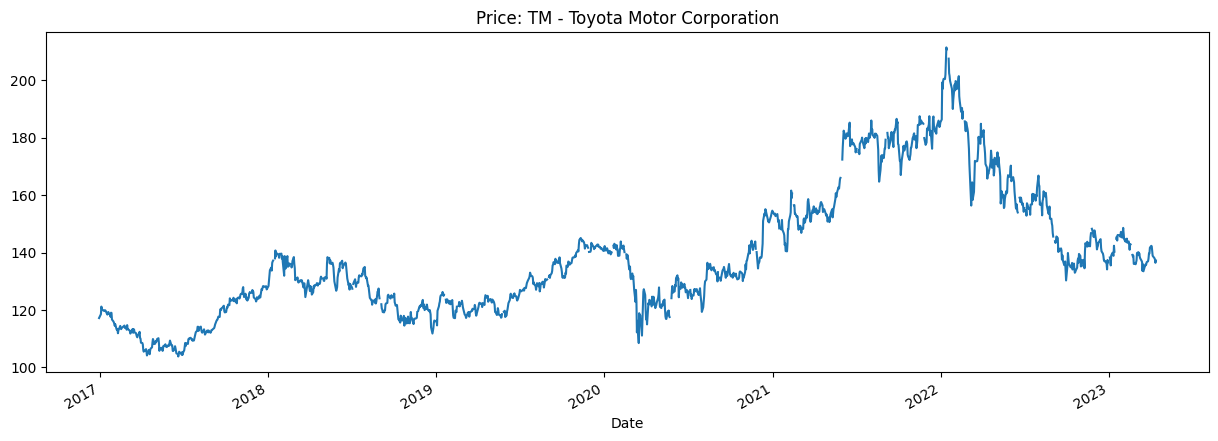

In [ ]:
ticker = 'TM'
name = lst_names[lst_stocks.index(ticker)]

fig = plt.figure(figsize=(15,5))
data['Adj Close'][ticker].plot()
plt.title('Price: {} - {}'.format(ticker, name));

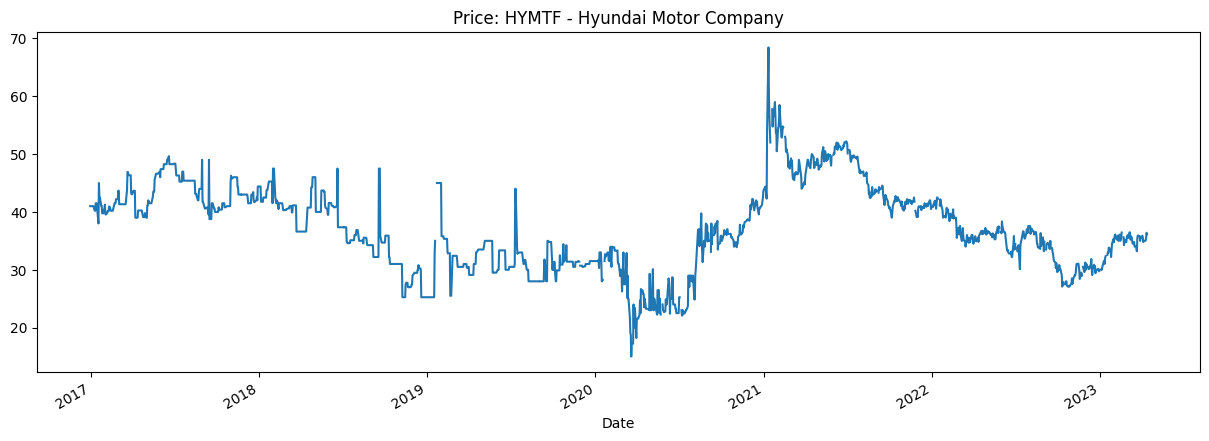

In [ ]:
ticker = 'HYMTF'
name = lst_names[lst_stocks.index(ticker)]

fig = plt.figure(figsize=(15,5))
data['Adj Close'][ticker].plot()
plt.title('Price: {} - {}'.format(ticker, name));

# Add price to Reviews

In [29]:
def add_price(row):
    tic = df_reviews2.loc[row.name, 'ticker']
    date = df_reviews2.loc[row.name, 'datecreated']
    check = True
    i = 0
    price = np.nan
    while check and i<3:
      try:
        dateprice = date - timedelta(days=i)
        price = data['Adj Close'][tic].loc[dateprice]
        check = False
      except:
        i += 1
    return price

In [30]:
def add_price5(row):
    tic = df_reviews2.loc[row.name, 'ticker']
    date = df_reviews2.loc[row.name, 'datecreated']
    check = True
    i = 0
    price5 = np.nan
    while check and i<3:
      try:
        dateprice = date + timedelta(days=7) - timedelta(days=i)
        price5 = data['Adj Close'][tic].loc[dateprice]
        check = False
      except:
        i += 1
    return price5

In [33]:
df_reviews2 = df_reviews[df_reviews['datecreated']>'2020-01-01'][['ticker','group','datecreated','replaced_message']].copy()

In [34]:
df_reviews2.head()

,ticker,group,datecreated,replaced_message
0,MBGYY,Mercedes-Benz,2021-12-15,"momoney232 said:Hello, I am trying to get the ..."
1,MBGYY,Mercedes-Benz,2021-12-15,Thank you for the reply. Can you let me know w...
2,MBGYY,Mercedes-Benz,2021-12-15,.00150 MF
3,MBGYY,Mercedes-Benz,2021-12-18,What about the eqs 580? Do you have rates for ...
4,MBGYY,Mercedes-Benz,2021-12-18,We do.Ask your question.


In [35]:
df_reviews2['pricet'] = np.nan
df_reviews2['pricew'] = np.nan

# Add last price 
df_reviews2['pricet'] = df_reviews2.apply(lambda row: add_price(row), axis=1)
# Add last price in a week (5 business day)
df_reviews2['pricew'] = df_reviews2.apply(lambda row: add_price5(row), axis=1)

In [40]:
# Returns
df_reviews2['ret'] = df_reviews2['pricew']/df_reviews2['pricet'] - 1
df_reviews2 = df_reviews2.dropna()

In [38]:
df_reviews2.head()

,ticker,group,datecreated,replaced_message,pricet,pricew,ret
0,MBGYY,Mercedes-Benz,2021-12-15,"momoney232 said:Hello, I am trying to get the ...",22.516418,22.037542,-0.021268
1,MBGYY,Mercedes-Benz,2021-12-15,Thank you for the reply. Can you let me know w...,22.516418,22.037542,-0.021268
2,MBGYY,Mercedes-Benz,2021-12-15,.00150 MF,22.516418,22.037542,-0.021268
3,MBGYY,Mercedes-Benz,2021-12-18,What about the eqs 580? Do you have rates for ...,21.706011,22.083588,0.017395
4,MBGYY,Mercedes-Benz,2021-12-18,We do.Ask your question.,21.706011,22.083588,0.017395


In [69]:
#df_reviews2.groupby('datecreated')['ret'].transform(lambda x: pd.qcut(x, 2, labels=[0,1]))

In [71]:
df_reviews2.to_csv('03_df_reviews_ret.csv', index=False)